# ПРАКТИКУМ 1. БІБЛІОТЕКА PANDAS

# Завдання:
1.  Завантажте набір даних. 
2.  Виведіть заголовок таблиці (перші 5 записів). 
3.  Скільки рядків і стовпців в таблиці? 
4.  Які назви стовпців? 
5.  Які типи даних у різних стовпців? 
6.  Скільки в кожному з них унікальних значень? 
7.  Скільки пропущених значень?

## Варіант 12 

Набір даних: додат ки в Google Play Store (googleplaystore.csv). Аналіз даних: 
1.  Визначте  ТОП-10  категорій,  додатки  в  яких  мають  найбільшу 
кількість завантажень. Побудуйте стовпчикову діаграму. 
2.  Чи  правда,  що  безкоштовні  додатки  з  категорії  «Шопінг»  мають 
більшу  кількість  завантажень,  ніж  платні  додатки  з  категорії 
«Освіта»? 
3.  Проаналізуйте,  чи  змінюється  частка  завантажень  платних 
додатків у категорії «Ігри» в залежності від вікової групи? 
4.  Визначте  5  категорій,  в  яких  платні  додатки  мають  найбільшу 
кількість відгуків. 
5.  Знайдіть  платні  додатки  в  категорії  «Сім’я»,  які  не  оновлювались 
більш ніж 5 років.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# 1. Завантаження даних
df = pd.read_csv('googleplaystore.csv')

# 2. Перші 5 записів
print("Перші 5 записів:")
df.head()


Перші 5 записів:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# 3. Кількість рядків і стовпців
df.shape

(10841, 13)

In [4]:
# 4. Назви стовпців
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# 5. Типи даних стовпців
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
# 6. Унікальні значення у кожному стовпці
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [7]:
# 7. Пропущені значення у кожному стовпці
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Чистка датасету

df['Installs'] = df['Installs'].str.replace('Free', '0', regex=True).replace('[+,]', '', regex=True).astype(int)

df['Price'] = df['Price'].str.replace('$', '').str.replace('Everyone', '0').astype(float)

df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')  # некоректні значення стануть NaN

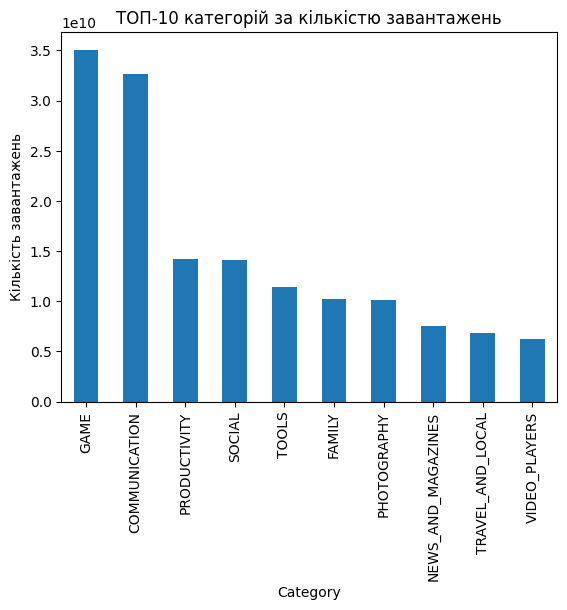

In [9]:
# 1.  Визначте  ТОП-10  категорій,  додатки  в  яких  мають  найбільшу 
# кількість завантажень. Побудуйте стовпчикову діаграму. 
top_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', title='ТОП-10 категорій за кількістю завантажень', ylabel='Кількість завантажень')
plt.show()

In [10]:
# 2.  Чи  правда,  що  безкоштовні  додатки  з  категорії  «Шопінг»  мають 
# більшу  кількість  завантажень,  ніж  платні  додатки  з  категорії 
# «Освіта»? 

SHOPPING_free= df[(df['Category'] == 'SHOPPING') & (df['Price'] == 0)]['Installs'].mean()
EDUCATION_paid = df[(df['Category'] == 'EDUCATION') & (df['Price'] > 0)]['Installs'].mean()

f'Installs_mean: {SHOPPING_free > EDUCATION_paid = }'

'Installs_mean: SHOPPING_free > EDUCATION_paid = True'

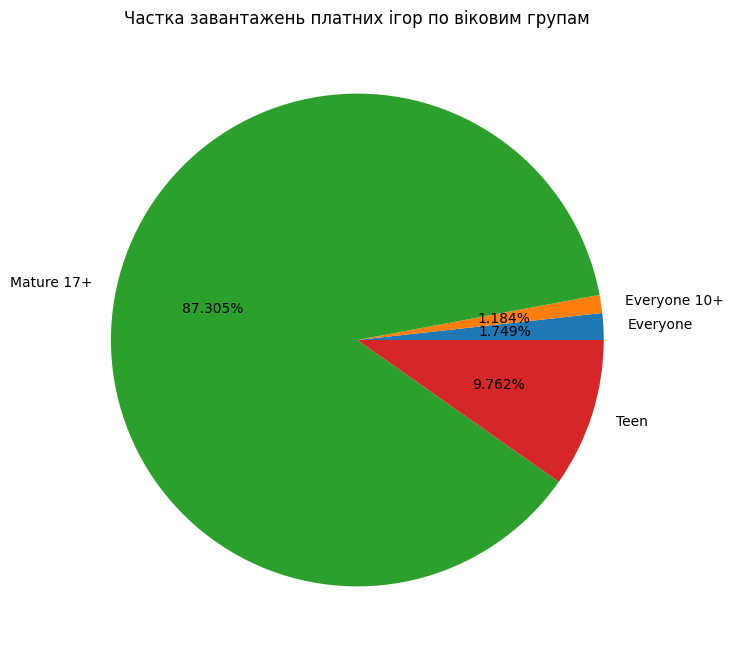

In [11]:
# 3. Проаналізуйте, чи змінюється частка завантажень платних # додаткі
# в у категорії «Ігри» в залежності від вікової групи? 

# Фільтруємо тільки ігри
games = df[df['Category'] == 'GAME']

# Групуємо ігри за віковою категорією (Content Rating)
paid_ratio = games.groupby('Content Rating').agg(
    total_installs=('Installs', 'sum'), # Загальна кількість завантажень у групі
    # Кількість завантажень лише платних додатків (де є ціна)
    paid_installs=('Installs', lambda x: x.loc[games.loc[x.index, 'Price'] > 0].sum())
)

# Створюємо новий стовпець з часткою завантажень платних додатків
paid_ratio_values = (paid_ratio['paid_installs'] / paid_ratio['total_installs'])

plt.figure(figsize=(8, 8))
plt.pie( x=paid_ratio_values, labels=paid_ratio_values.index, autopct='%1.3f%%',                
)
plt.title("Частка завантажень платних ігор по віковим групам")
plt.show()

In [22]:
# 4.  Визначте  5  категорій,  в  яких  платні  додатки  мають  найбільшу 
# кількість відгуків.
df[df['Price'] > 0].groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(5)


Category
FAMILY             6046530.0
GAME               1591503.0
PERSONALIZATION     449657.0
PHOTOGRAPHY         230654.0
TOOLS               171937.0
Name: Reviews, dtype: float64

In [21]:
# 5.  Знайдіть  платні  додатки  в  категорії  «Сім’я»,  які  не  оновлювались 
# більш ніж 5 років.  

from datetime import datetime, timedelta

five_years_ago = datetime.now() - timedelta(days=5*365)
family_paid_old = df[(df['Category'] == 'FAMILY') & (df['Price'] > 0) & (df['Last Updated'] < five_years_ago)]

print(f'Додатків які не оновлювались вже 5 років {len(family_paid_old)} штук')
family_paid_old[['App', 'Price', 'Last Updated']].sort_values(by='Last Updated', ascending=False)


Додатків які не оновлювались вже 5 років 191 штук


,App,Price,Last Updated
8371,ZombieVital DG,12.99,2018-08-04
4411,Age of Conquest: N. America,3.99,2018-08-04
4559,Elemental Knights R Platinum,4.77,2018-08-01
8726,DRAGON QUEST VI,14.99,2018-08-01
4711,DRAGON QUEST V,14.99,2018-08-01
...,...,...,...
6753,BS Detector - Diss 'n' Gauges,1.49,2013-02-22
5978,Truck Driving Test Class 3 BC,1.49,2012-04-09
5977,Car Driving Theory Test BC,1.49,2012-04-09
10798,Word Search Tab 1 FR,1.04,2012-02-06
